# Notebook n.2

In [1]:
%matplotlib notebook

## Il problema delle monete nel portafoglio

Vogliamo risolvere il seguente problema:  da un portafoglio,  contenente **2 monete da €2**, **6 monete da 1** e **10 monete da 0,50**, si estrae una moneta alla volta. Qual è la probabilità che alla **settima estrazione** si estragga **€1**, sapendo che dopo la **sesta estrazione** sono stati estratti in totale **€6**?

Per risolverlo utilizzeremo la distribuzione **ipergeometrica multivariata**. Questa distribuzione risponde ad una tipologia di domande un po' differenti. Ad esempio, dato il portafoglio descritto sopra, se ci chiediamo qual è la probabilità $P\left(1, 4, 5 \right)$ di estrarre **1 moneta da €2**, **4 monete da €1** e **5 monete da €0,50** in **10** estrazioni, la distribuzione ipergeometrica ci dice che

$$P\left(1,4,5\right)=\frac{\binom{2}{1} \binom{6}{4} \binom{10}{5}}{\binom{18}{10}}$$

Come vedremo, utilizzando le **leggi della probabilità**, possiamo ricondurre il problema a domande di questo tipo.

### Calcolo esatto

In [2]:
# Calcola la probabilità di estrarre a monete da €2, b monete da €1 e c monete da €0.50
# dal portafoglio del problema in a + b + c estrazioni
import scipy.special as s
def hypergeometric(a, b, c):
    A, B, C = 2, 6, 10
    return s.binom(A,a)*s.binom(B,b)*s.binom(C,c)/s.binom(A+B+C, a+b+c)

In [3]:
# Probabilità di estrarre 6€ in 6 estrazioni
p_A6_eq_6 = hypergeometric(2,0,4) + hypergeometric(1,3,2) + hypergeometric(0,6,0); p_A6_eq_6

0.10832794656324068

In [4]:
# Probabilità di estrarre 6€ in 6 estrazioni e 7€ in 7 estrazioni
#
# 6/12 è la probabilità di estrarre un euro alla settima estrazione dopo aver estratto (2, 0, 4)
# 3/12 è la probabilità di estrarre un euro alla settima estrazione dopo aver estratto (1, 3, 2)
p_A6_eq_6_E_A7_eq_7 = hypergeometric(2,0,4)*6/12 + hypergeometric(1,3,2)*3/12; p_A6_eq_6_E_A7_eq_7

0.029896574014221074

In [5]:
# Probabilità di estrarre 7€ in 7 estrazioni dato che si sono estratti 6€ in 6 estrazioni
#
# P(A | B) = P(A e B) / P(B)
p_A7_eq_7_given_A6_eq_6 = p_A6_eq_6_E_A7_eq_7 / p_A6_eq_6; p_A7_eq_7_given_A6_eq_6

0.2759820984584784

### Calcolo approssimato tramite simulazione

Calcoliamo un'**approssimazione** dei tre valori precedenti usando delle **simulazioni**.

In [6]:
# lista con le monete
coins = [2]*2 + [1]*6 +[0.5]*10; coins

[2, 2, 1, 1, 1, 1, 1, 1, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]

In [7]:
import random

In [8]:
# probabilità di estarre €6 in 6 estrazioni
def get_p_A6_eq_6(n):
    m = 0
    for i in range(n):
        sample = random.sample(coins, 6)
        if sum(sample) == 6:
            m += 1
    return m / n

In [9]:
# il valore restituito dalla simulazione è vicino
# a quello calcolato?
get_p_A6_eq_6(1_000_000)

0.108423

In [10]:
# probabilità di estarre €6 in 6 estrazioni e €7 in 7 estrazioni
def get_p_A6_eq_6_E_A7_eq_7(n):
    m = 0
    for i in range(n):
        sample = random.sample(coins, 7)
        if sum(sample[:-1]) == 6 and sum(sample) == 7:
            m += 1
    return m / n

In [11]:
get_p_A6_eq_6_E_A7_eq_7(1_000_000)

0.029959

In [12]:
# probabilità di estarre €7 in 7 estrazioni sapendo che sono stati estratti €6 in 6 estrazioni
def get_p_A7_eq_7_given_A6_eq_6(n):
    l, m = 0, 0
    for i in range(n):
        sample = random.sample(coins, 7)
        if sum(sample[:-1]) == 6:
            m += 1
            if sum(sample) == 7:
                l +=1 
    return l / m

In [13]:
get_p_A7_eq_7_given_A6_eq_6(1_000_000)

0.2745069138008862

### Calcolo ricorsivo della probabilità ipergeometrica

In [14]:
def hypergeometric_recursive(ns, Ns):
    '''Calcola ricorsivamente la probabilità ipergeometrica
    
    Args
    ----
    Ns - E' una lista che rappresenta le biglie nell'urna. L'elemento i-esimo 
         è il numero di biglie dell'i-esimo colore nell'urna
    ns - E' una lista che rappresenta un'estrazione. L'elemento i-esimo è il 
         numero di biglie dell'i-esimo colore estratte
         
    Returns
    -------
    probability - probabilità di ottenere  l'estrazione descritta da ns
                  data un'urna descritta da Ns
    '''
    if sum(ns) == 0:
        return 1
    
    remained_coins = sum(Ns) - sum(ns) + 1
    ret_value = 0
    for i, (n, N) in enumerate(zip(ns, Ns)):
        if n > 0:
            ns_ = ns.copy()
            ns_[i] -= 1
            ret_value += (N-n+1)/remained_coins * hypergeometric_recursive(ns_, Ns)
            
    return ret_value

In [15]:
hypergeometric_recursive([2, 4, 5], [2, 6, 10])

0.11877828054298642

In [16]:
hypergeometric(2, 4, 5)

0.11877828054298642

## Serie geometrica

$$\sum_{n=0}^{\infty }q^{n}=\frac{1}{1-q} \;\;  \textrm{se} \;\; \left | q \right |<1$$

<img src="img/serie_geometrica.png" alt="Serie geometrica" style="width: 400px;"/>
<center><strong>Dimostrazione grafica</strong> della convergenza della serie geometrica.</center>

In [17]:
def geometric_partial_sums(q, n):
    '''Ritorna le somme parziali di una serie geometrica
    
    Args
    ----
    q - la ragione della serie geometrica
    n - il numero di addendi da sommare (fino a q^(n-1))
    
    Returns
    -------
    partial_sums - una lista di lunghezza n con le somme parziali
                   partial_sums = [1, 1 + q, 1 + q + q^2, ...]
    '''
    sum_ = 0
    partial_sums = []
    for i in range(n):
        sum_ += q**i
        partial_sums.append(sum_)
    return partial_sums

Studiate **graficamente** il **comportamento** della serie se

* $q < -1$
* $q = -1$
* $ -1 < q < 1$
* $q >= 1$

<IPython.core.display.Javascript object>


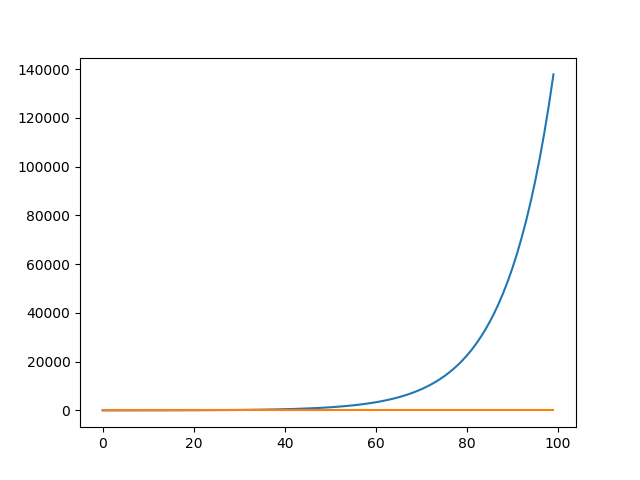

In [18]:
import matplotlib.pyplot as plt

q = 1.1
n = 100
partial_sums = geometric_partial_sums(q, n)
plt.plot(partial_sums)
plt.plot([1/(1-q)]*len(partial_sums)) # valore limite

## Mondo griglia

Nelle lezioni di **teoria** avete visto il **Mondo Griglia**.

<img src="img/gridworld.png" alt="Mondo griglia" style="width: 600px;"/>

<center>Immagine tratta dal libro di <a href="http://incompleteideas.net/book/RLbook2018.pdf">Reinforcement Learning: An Introduction</a> di <strong>R. Sutton</strong>.</center>

In questa sezione impareremo a:

* trovare il **valore** di ogni **stato** data una policy
* utilizzare i valori ottenuti per **migliorare** la policy
* trovare una policy **ottimale**

### Valutazione di una policy

In [19]:
# restituisce la policy uniforme, cioè quella che in ogni stato
# assegna la stessa probabilità alle 4 direzioni
def get_uniform_random_policy():
    policy = dict()
    for i in range(5):
        for j in range(5):
            policy[(i, j)] = {"L" : 1/4, "R" : 1/4, "U" : 1/4, "D" : 1/4}
    return policy

In [20]:
uniform_random_policy = get_uniform_random_policy(); uniform_random_policy

{(0, 0): {'L': 0.25, 'R': 0.25, 'U': 0.25, 'D': 0.25},
 (0, 1): {'L': 0.25, 'R': 0.25, 'U': 0.25, 'D': 0.25},
 (0, 2): {'L': 0.25, 'R': 0.25, 'U': 0.25, 'D': 0.25},
 (0, 3): {'L': 0.25, 'R': 0.25, 'U': 0.25, 'D': 0.25},
 (0, 4): {'L': 0.25, 'R': 0.25, 'U': 0.25, 'D': 0.25},
 (1, 0): {'L': 0.25, 'R': 0.25, 'U': 0.25, 'D': 0.25},
 (1, 1): {'L': 0.25, 'R': 0.25, 'U': 0.25, 'D': 0.25},
 (1, 2): {'L': 0.25, 'R': 0.25, 'U': 0.25, 'D': 0.25},
 (1, 3): {'L': 0.25, 'R': 0.25, 'U': 0.25, 'D': 0.25},
 (1, 4): {'L': 0.25, 'R': 0.25, 'U': 0.25, 'D': 0.25},
 (2, 0): {'L': 0.25, 'R': 0.25, 'U': 0.25, 'D': 0.25},
 (2, 1): {'L': 0.25, 'R': 0.25, 'U': 0.25, 'D': 0.25},
 (2, 2): {'L': 0.25, 'R': 0.25, 'U': 0.25, 'D': 0.25},
 (2, 3): {'L': 0.25, 'R': 0.25, 'U': 0.25, 'D': 0.25},
 (2, 4): {'L': 0.25, 'R': 0.25, 'U': 0.25, 'D': 0.25},
 (3, 0): {'L': 0.25, 'R': 0.25, 'U': 0.25, 'D': 0.25},
 (3, 1): {'L': 0.25, 'R': 0.25, 'U': 0.25, 'D': 0.25},
 (3, 2): {'L': 0.25, 'R': 0.25, 'U': 0.25, 'D': 0.25},
 (3, 3): {

In [21]:
# spostamento (di, dj) associato ad ogni azione
#
# ad esempio quando ci si sposta a sinistra (L)
# la coordinata verticale non cambia, mentre quella
# orizzontake diminuisce di 1
direction = {"L" : (0, -1), "R" : (0, 1), "U" : (-1, 0), "D" : (1, 0)}

In [22]:
direction["L"]

(0, -1)

In [23]:
import numpy as np
def create_system_coefficients(policy, discount_factor=1):
    '''Crea il sistema risolvendo il quale si trovano i valori dei 25 stati
    
    Args
    ----
    policy - una dizionario che rappresenta una policy (vedi la rappresentazione della policy uniforme)
    discount_factor - il fattore di sconto
    
    Return
    ------
    A - la matrice dei coefficienti del sistema (matrice numpy 25 x 25)
    b - il vettore dei termini noti (vettore unidimensionale numpy di 25 elementi)
    '''
    A = np.eye(25)
    b = np.zeros(25)
    for i in range(5):
        for j in range(5):
            n = i*5 + j
            if n == 1 or n == 3:
                continue
            for action in "LRUD":
                di, dj = direction[action]
                action_prob = policy[(i, j)][action]
                if 0<=i+di<=4 and 0<=j+dj<=4:
                    A[n, (i+di)*5 + (j+dj)] -= discount_factor*action_prob
                else:
                    b[n] -= action_prob
                    A[n, n] -= discount_factor*action_prob
                    
    A[1, 21] = -discount_factor
    b[1] = 10
    
    A[3, 13] = -discount_factor
    b[3] = 5
    
    return A, b

In [24]:
A, b = create_system_coefficients(uniform_random_policy)

In [25]:
A

array([[ 0.5 , -0.25,  0.  ,  0.  ,  0.  , -0.25,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  , -1.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  , -0.25,  0.75, -0.25,  0.  ,  0.  ,  0.  , -0.25,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  , -1.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , -0.25,  0.5 ,  0.  ,  0.  ,  0.  ,  0.  ,
        -0.25,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],


In [26]:
b

array([-0.5 , 10.  , -0.25,  5.  , -0.5 , -0.25,  0.  ,  0.  ,  0.  ,
       -0.25, -0.25,  0.  ,  0.  ,  0.  , -0.25, -0.25,  0.  ,  0.  ,
        0.  , -0.25, -0.5 , -0.25, -0.25, -0.25, -0.5 ])

In [27]:
np.linalg.matrix_rank(A)

24

In [28]:
np.linalg.matrix_rank(np.concatenate((A, np.reshape(b, (25, 1))), axis=1))

25

In [29]:
A, b = create_system_coefficients(uniform_random_policy, 0.9)

In [30]:
A

array([[ 0.55 , -0.225,  0.   ,  0.   ,  0.   , -0.225,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ],
       [ 0.   ,  1.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ,  0.   , -0.9  ,  0.   ,  0.   ,
         0.   ],
       [ 0.   , -0.225,  0.775, -0.225,  0.   ,  0.   ,  0.   , -0.225,
         0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ],
       [ 0.   ,  0.   ,  0.   ,  1.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ,  0.   , -0.9  ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ],
       [ 0.   ,  0.   ,  0.   , -0.225,  0.55 ,  0.   ,  0.   ,  0. 

In [31]:
b

array([-0.5 , 10.  , -0.25,  5.  , -0.5 , -0.25,  0.  ,  0.  ,  0.  ,
       -0.25, -0.25,  0.  ,  0.  ,  0.  , -0.25, -0.25,  0.  ,  0.  ,
        0.  , -0.25, -0.5 , -0.25, -0.25, -0.25, -0.5 ])

In [32]:
np.linalg.matrix_rank(A)

25

In [33]:
policy_evaluation = np.linalg.solve(A, b).reshape((5, 5)); policy_evaluation

array([[ 3.30899634,  8.78929186,  4.42761918,  5.32236759,  1.49217876],
       [ 1.52158807,  2.99231786,  2.25013995,  1.9075717 ,  0.54740271],
       [ 0.05082249,  0.73817059,  0.67311326,  0.35818621, -0.40314114],
       [-0.9735923 , -0.43549543, -0.35488227, -0.58560509, -1.18307508],
       [-1.85770055, -1.34523126, -1.22926726, -1.42291815, -1.97517905]])

### Costruzione di una policy migliore

In [37]:
def get_better_policy(policy_evaluation, discount_factor):
    '''Trova la policy migliore data una valiutazione degli stati
    
    Args
    ----
    policy_evaluation - una matrice numpy 5 x 5 con i valori degli stati (relativi ad una certa policy).
                        In policy_evaluation[i, j] i è l'indice di riga (dall'alto verso il basso, da 0 a 4)
                        e j è l'indice di colonna (da sinistra a destra, da 0 a 4)
    discount_factor - il fattore di sconto        
    
    Return
    ------
    better_policy - La policy migliore dati i valori degli stati contenuto in policy_evaluation.
    '''
    def evaluate_actions(i, j):
        if (i, j) == (0, 1):
            val = 10 + policy_evaluation[4, 1]
            return {"L" : val, "R" : val, "U" : val, "D" : val}
        
        if(i, j) == (0, 3):
            val = 5 + policy_evaluation[2, 3]
            return {"L" : val, "R" : val, "U" : val, "D" : val}
        
        values = dict()
        for action in "LRUD":
            di, dj = direction[action]
            if 0<=i+di<=4 and 0<=j+dj<=4:
                values[action] = discount_factor*policy_evaluation[i+di, j+dj]
            else:
                values[action] = -1 + discount_factor*policy_evaluation[i, j]
        return values
    
    better_policy = dict()
    for i in range(5):
        for j in range(5):
            action_values = evaluate_actions(i, j)
            first_best_action = [action for action in action_values if action_values[action] \
                                == max(action_values.values())][0]
            better_policy_actions = dict()
            for action in "LRUD":
                better_policy_actions[action] = 1 if action == first_best_action else 0
            better_policy[(i, j)] = better_policy_actions
            
    return better_policy

In [38]:
better_policy = get_better_policy(policy_evaluation, discount_factor=0.9); better_policy

{(0, 0): {'L': 0, 'R': 1, 'U': 0, 'D': 0},
 (0, 1): {'L': 1, 'R': 0, 'U': 0, 'D': 0},
 (0, 2): {'L': 1, 'R': 0, 'U': 0, 'D': 0},
 (0, 3): {'L': 1, 'R': 0, 'U': 0, 'D': 0},
 (0, 4): {'L': 1, 'R': 0, 'U': 0, 'D': 0},
 (1, 0): {'L': 0, 'R': 0, 'U': 1, 'D': 0},
 (1, 1): {'L': 0, 'R': 0, 'U': 1, 'D': 0},
 (1, 2): {'L': 0, 'R': 0, 'U': 1, 'D': 0},
 (1, 3): {'L': 0, 'R': 0, 'U': 1, 'D': 0},
 (1, 4): {'L': 1, 'R': 0, 'U': 0, 'D': 0},
 (2, 0): {'L': 0, 'R': 0, 'U': 1, 'D': 0},
 (2, 1): {'L': 0, 'R': 0, 'U': 1, 'D': 0},
 (2, 2): {'L': 0, 'R': 0, 'U': 1, 'D': 0},
 (2, 3): {'L': 0, 'R': 0, 'U': 1, 'D': 0},
 (2, 4): {'L': 0, 'R': 0, 'U': 1, 'D': 0},
 (3, 0): {'L': 0, 'R': 0, 'U': 1, 'D': 0},
 (3, 1): {'L': 0, 'R': 0, 'U': 1, 'D': 0},
 (3, 2): {'L': 0, 'R': 0, 'U': 1, 'D': 0},
 (3, 3): {'L': 0, 'R': 0, 'U': 1, 'D': 0},
 (3, 4): {'L': 0, 'R': 0, 'U': 1, 'D': 0},
 (4, 0): {'L': 0, 'R': 0, 'U': 1, 'D': 0},
 (4, 1): {'L': 0, 'R': 0, 'U': 1, 'D': 0},
 (4, 2): {'L': 0, 'R': 0, 'U': 1, 'D': 0},
 (4, 3): {'

### Costruzione di una policy ottimale

In [39]:
# Determina l'uguaglinza o meno di due policy
def policies_are_equal(policy_1, policy_2):
    for square, actions_dict in policy_1.items():
        for action, value in actions_dict.items():
            if policy_2[square][action] != value:
                return False
    return True

In [40]:
# iteriamo lo step di valutazione e quello di miglioramento fino a convergenza
policy = get_uniform_random_policy()
discount_factor = 0.9

while True:
    A, b = create_system_coefficients(policy, discount_factor)
    policy_evaluation = np.linalg.solve(A, b).reshape((5, 5))
    new_policy = get_better_policy(policy_evaluation, discount_factor)
    if policies_are_equal(policy, new_policy):
        break
    else:
        policy = new_policy
policy

{(0, 0): {'L': 0, 'R': 1, 'U': 0, 'D': 0},
 (0, 1): {'L': 1, 'R': 0, 'U': 0, 'D': 0},
 (0, 2): {'L': 1, 'R': 0, 'U': 0, 'D': 0},
 (0, 3): {'L': 1, 'R': 0, 'U': 0, 'D': 0},
 (0, 4): {'L': 1, 'R': 0, 'U': 0, 'D': 0},
 (1, 0): {'L': 0, 'R': 1, 'U': 0, 'D': 0},
 (1, 1): {'L': 0, 'R': 0, 'U': 1, 'D': 0},
 (1, 2): {'L': 1, 'R': 0, 'U': 0, 'D': 0},
 (1, 3): {'L': 1, 'R': 0, 'U': 0, 'D': 0},
 (1, 4): {'L': 1, 'R': 0, 'U': 0, 'D': 0},
 (2, 0): {'L': 0, 'R': 0, 'U': 1, 'D': 0},
 (2, 1): {'L': 0, 'R': 0, 'U': 1, 'D': 0},
 (2, 2): {'L': 1, 'R': 0, 'U': 0, 'D': 0},
 (2, 3): {'L': 1, 'R': 0, 'U': 0, 'D': 0},
 (2, 4): {'L': 1, 'R': 0, 'U': 0, 'D': 0},
 (3, 0): {'L': 0, 'R': 1, 'U': 0, 'D': 0},
 (3, 1): {'L': 0, 'R': 0, 'U': 1, 'D': 0},
 (3, 2): {'L': 1, 'R': 0, 'U': 0, 'D': 0},
 (3, 3): {'L': 1, 'R': 0, 'U': 0, 'D': 0},
 (3, 4): {'L': 1, 'R': 0, 'U': 0, 'D': 0},
 (4, 0): {'L': 0, 'R': 1, 'U': 0, 'D': 0},
 (4, 1): {'L': 0, 'R': 0, 'U': 1, 'D': 0},
 (4, 2): {'L': 1, 'R': 0, 'U': 0, 'D': 0},
 (4, 3): {'